<a href="https://colab.research.google.com/github/totobulu/dark-forest-novel/blob/main/Copy_of_DSR40_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gensim to create word embeddings.

## Dr. Tristan Behrens.

In this notebook we will use Gensim to create word embeddings from a corpus.

Word embedding are just fantastic. In a nutshell, they map words to vectors. And with vectors, as we all know, you can do math.

- [Wikipedia: Word Embedding](https://en.wikipedia.org/wiki/Word_embedding).

---

Firstly, we download the corpus. We download the entire Harry Potter collection. Feel free, to use your own corpus.

In [ ]:
!ls

 sample_data  'The Three-Body Problem Series_ The Three-B - Cixin Liu.txt'


## Import all necessary modules.

In [ ]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [ ]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [ ]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 1 files
Got 28575 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [ ]:
model.wv.most_similar("sophons", topn=20)

[('blinded', 0.7826423645019531),
 ('significant', 0.7601271867752075),
 ('blind', 0.7571500539779663),
 ('grasp', 0.7521564364433289),
 ('intercepted', 0.7454791069030762),
 ('shocking', 0.7407520413398743),
 ('achieve', 0.7334616184234619),
 ('determine', 0.7330758571624756),
 ('communicating', 0.7325531840324402),
 ('extent', 0.7317416667938232),
 ('recognition', 0.7308548092842102),
 ('communication', 0.7298707365989685),
 ('trisolarans', 0.7296884655952454),
 ('intelligences', 0.7295413017272949),
 ('decoding', 0.7289607524871826),
 ('concept', 0.7286438345909119),
 ('captured', 0.7250150442123413),
 ('subsequent', 0.7249710559844971),
 ('possibilities', 0.7236179113388062),
 ('determined', 0.7235348224639893)]

In [ ]:
model.wv.most_similar("china", topn=20)

[('dynasty', 0.8296825885772705),
 ('award', 0.820859432220459),
 ('hugo', 0.7950363159179688),
 ('writer', 0.7829591035842896),
 ('poet', 0.7821534276008606),
 ('translator', 0.7813723683357239),
 ('republic', 0.780353307723999),
 ('japanese', 0.774876594543457),
 ('bc', 0.7736146450042725),
 ('mao', 0.7657533884048462),
 ('winner', 0.7654480338096619),
 ('publications', 0.7653530240058899),
 ('etc', 0.764471173286438),
 ('chinese', 0.7633177042007446),
 ('pronounced', 0.7612770199775696),
 ('educational', 0.7585176229476929),
 ('export', 0.7533143758773804),
 ('note', 0.748100996017456),
 ('fiction', 0.7453147768974304),
 ('ltd', 0.7449531555175781)]

## list most frequent words in the book

In [ ]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from collections import Counter

# Define a function to preprocess the text and count word frequencies
def get_most_frequent_words(file_path, top_n=20):
    # Read the content of the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text (split into words) and remove stopwords using Gensim's STOPWORDS
    tokens = gensim.utils.simple_preprocess(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(tokens)

    # Get the top N most common words
    most_common_words = word_counts.most_common(top_n)

    return most_common_words

# Example usage
file_path = 'The Three-Body Problem Series_ The Three-B - Cixin Liu.txt'  # Path to the Three-Body Problem text file
top_20_words = get_most_frequent_words(file_path, top_n=20)
print(top_20_words)

[('like', 1807), ('said', 1736), ('space', 1567), ('time', 1496), ('cheng', 1456), ('xin', 1428), ('luo', 955), ('world', 942), ('earth', 925), ('ji', 872), ('light', 813), ('years', 771), ('people', 766), ('long', 747), ('sun', 740), ('know', 702), ('wang', 680), ('looked', 633), ('shi', 630), ('eyes', 610)]


## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

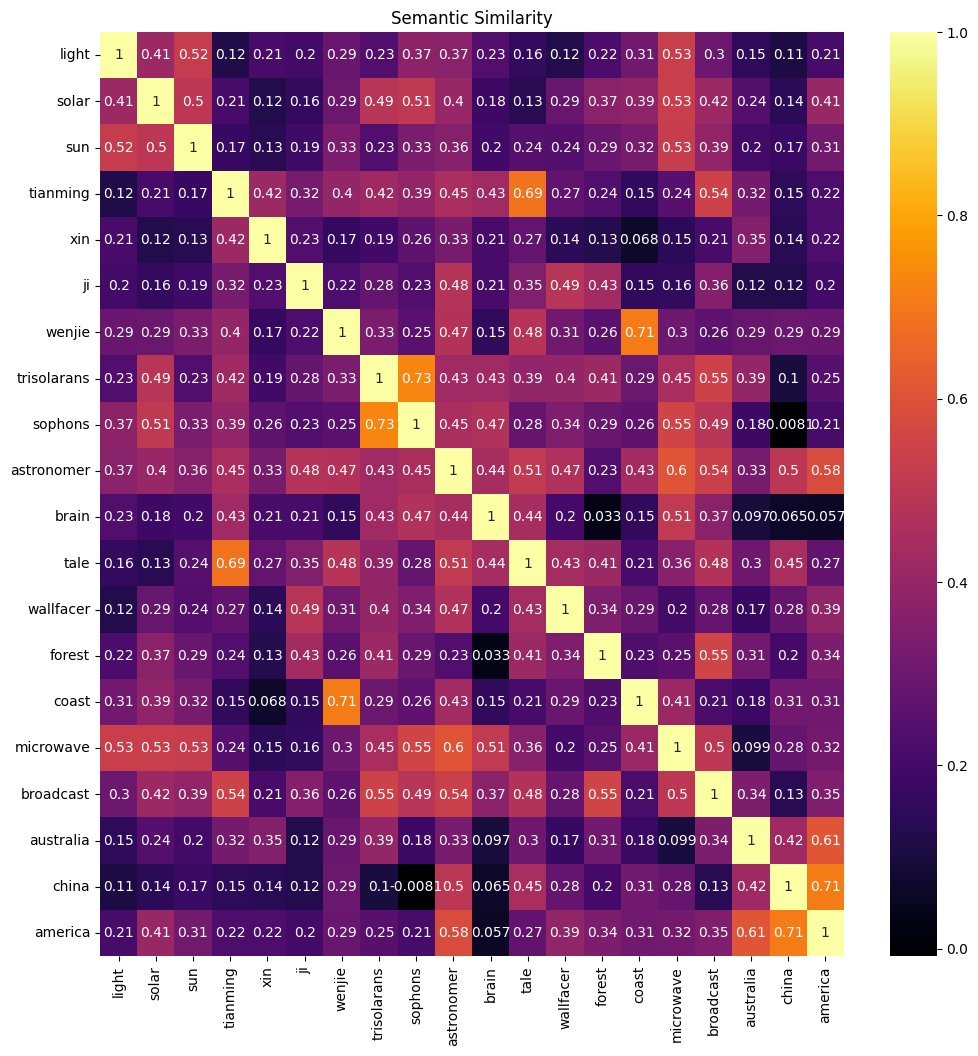

In [ ]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "light",
    "solar",
    "sun",
    "tianming",
    "xin",
    "ji",
    "wenjie",
    "trisolarans",
    "sophons",
    "astronomer",
    "brain",
    "tale",
    "wallfacer",
    "forest",
    "coast",
    "microwave",
    "broadcast",
    "australia",
    "china",
    "america"
]
plot_similarities(words)

# Thank you!